In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\\Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


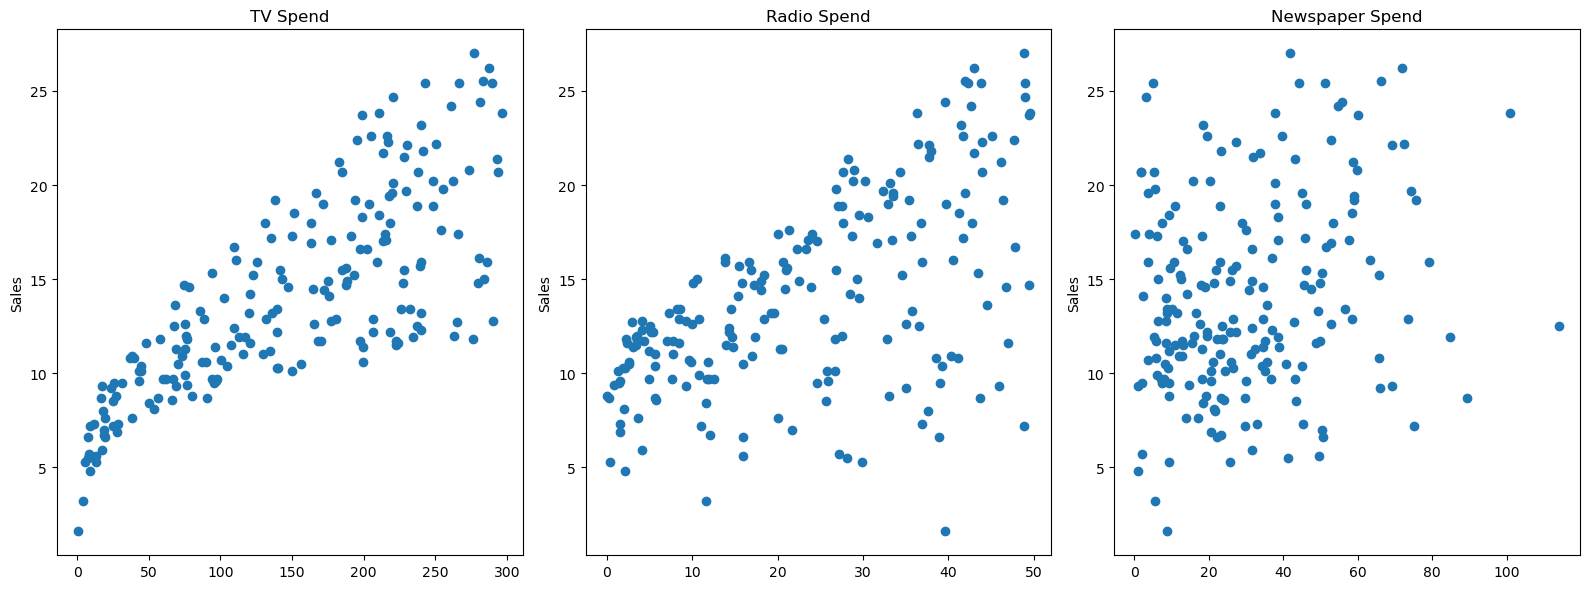

In [10]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['sales'],'o')
axes[0].set_ylabel('Sales')
axes[0].set_title("TV Spend")


axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_ylabel('Sales')
axes[1].set_title("Radio Spend")


axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_ylabel('Sales')
axes[2].set_title("Newspaper Spend")

plt.tight_layout()

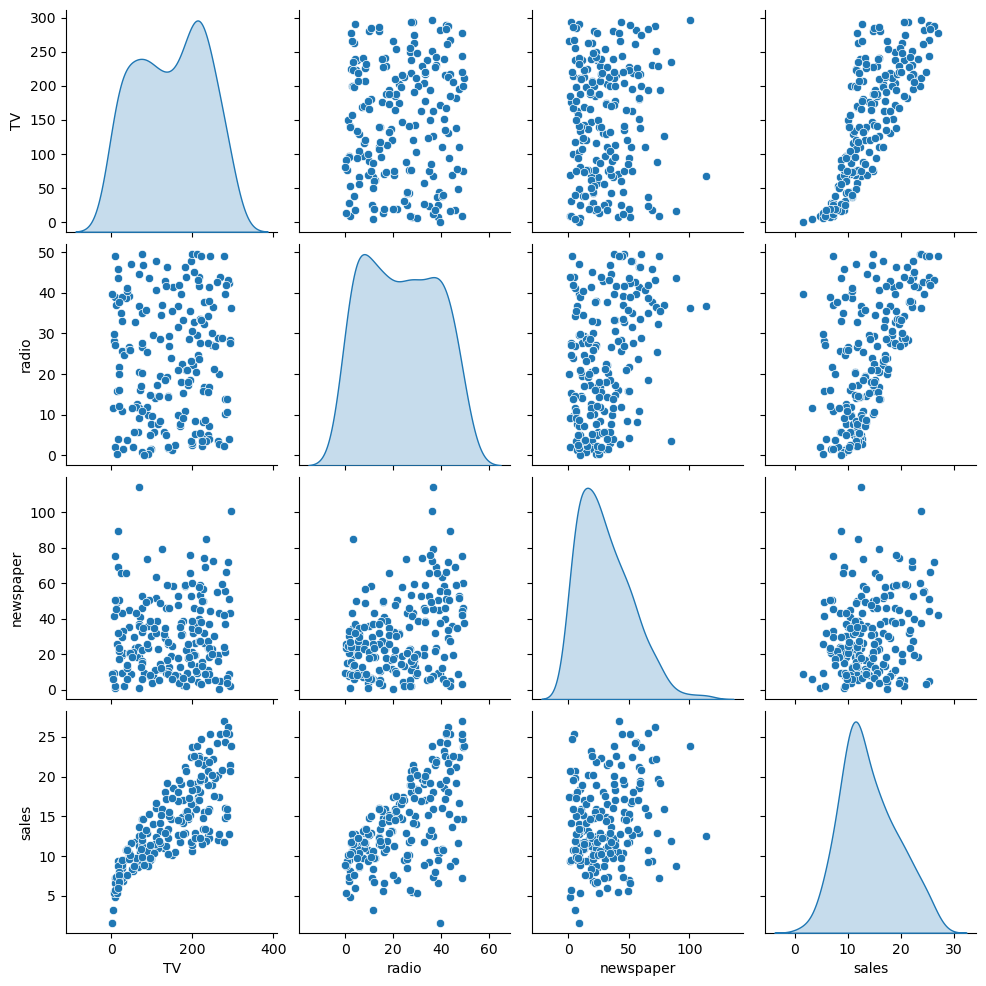

In [11]:
sns.pairplot(df, diag_kind='kde')

In [16]:
X = df.drop('sales', axis=1)
y = df['sales']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [19]:

X_train

,TV,radio,newspaper
154,187.8,21.1,9.5
114,78.2,46.8,34.5
118,125.7,36.9,79.2
64,131.1,42.8,28.9
165,234.5,3.4,84.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [20]:
y_train

154    15.6
114    14.6
118    15.9
64     18.0
165    11.9
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 134, dtype: float64

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()

In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
test_predictions = model.predict(X_test)

In [27]:
test_predictions

array([15.64343813, 19.58078283, 11.42717781, 16.90494334,  9.17645232,
        7.01921001, 20.24548588, 17.27288092,  9.81362002, 19.15221858,
       12.36281849, 13.90086335, 13.74679921, 21.16322282, 18.31876004,
        9.96472602, 15.56312703,  7.73452007,  7.57314037, 20.32745421,
        7.79414911, 18.16308067, 24.57041484, 22.71055089,  8.01558318,
       12.65730219, 21.43661308,  8.04499619, 12.43159447, 12.40259255,
       10.70029092, 19.16776811, 10.10150532,  6.69083331, 17.24889776,
        7.79224406,  9.25952001,  8.31516806, 10.51963092, 10.67086792,
       12.88094679,  9.79344981, 10.20060813,  8.013982  , 11.54267429,
       10.07800983,  8.98583386, 16.21285502, 13.20750313, 20.70094692,
       12.42670309, 13.96572233, 17.55475937, 11.15936616, 12.58108647,
        5.54230087, 23.22486082, 12.58536565, 18.76366836, 15.15376302,
       15.15931391, 23.91773675,  6.78191588, 19.84529505, 13.86858162,
       21.07676645])

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [30]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)

In [31]:
MAE

1.2369188494259309

In [32]:
MSE

2.348375242713826

In [33]:
RMSE

1.5324409426512415

In [34]:
df['sales'].mean()

14.022500000000003

In [35]:
quartet = pd.read_csv('D://anscombes_quartet4.csv')

In [36]:
quartet


,x,y
0,8.0,6.58
1,8.0,5.76
2,8.0,7.71
3,8.0,8.84
4,8.0,8.47
5,8.0,7.04
6,8.0,5.25
7,19.0,12.50
8,8.0,5.56
9,8.0,7.91


In [37]:
# np.polyfit(X,y,deg=1)
# y = 3.00 + 0.500x

In [38]:
quartet['pred_y'] = 3 + .5 * quartet['x']

In [39]:
quartet['residuals'] = quartet['y'] - quartet['pred_y']

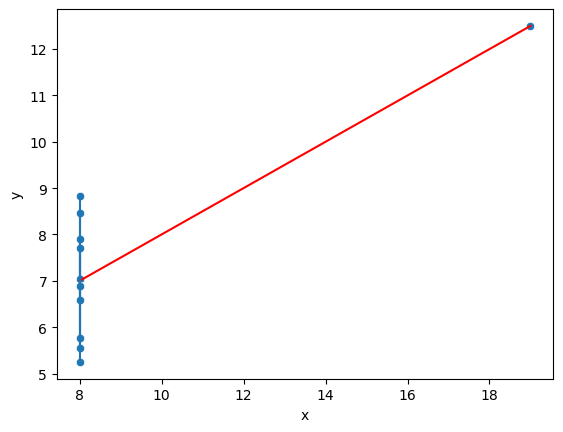

In [41]:
sns.scatterplot(data=quartet, x='x', y='y')
sns.lineplot(data=quartet, x='x', y='pred_y', color='red')
plt.vlines(quartet['x'], quartet['y'], quartet['y']-quartet['residuals'])

<AxesSubplot:xlabel='residuals', ylabel='Density'>

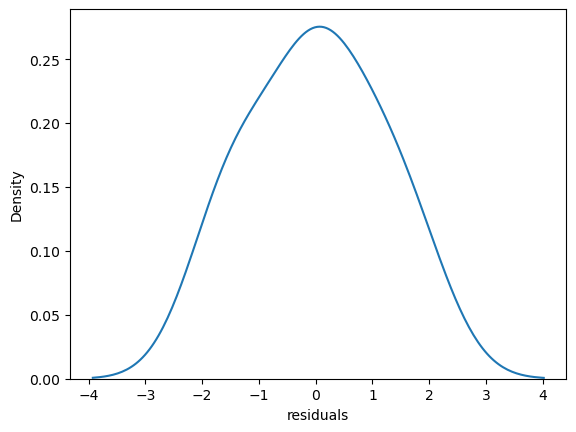

In [42]:
sns.kdeplot(quartet['residuals'])

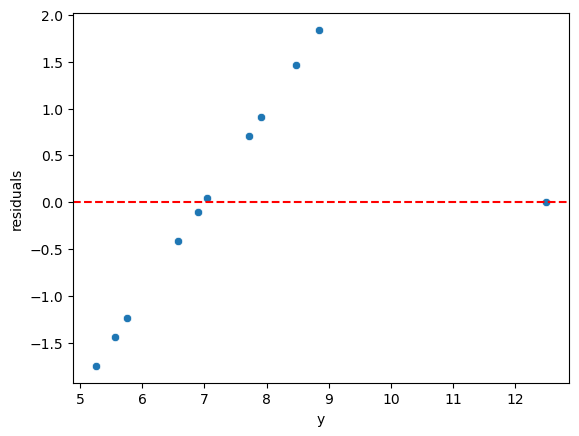

In [44]:
sns.scatterplot(data=quartet, x='y', y='residuals')
plt.axhline(y=0, color='red', linestyle='--')

In [45]:
quartet = pd.read_csv('D://anscombes_quartet2.csv')

In [48]:
quartet.columns = ['x','y']

In [49]:
quartet['pred_y'] = 3 + .5 * quartet['x']

In [50]:
quartet['residuals'] = quartet['y'] - quartet['pred_y']

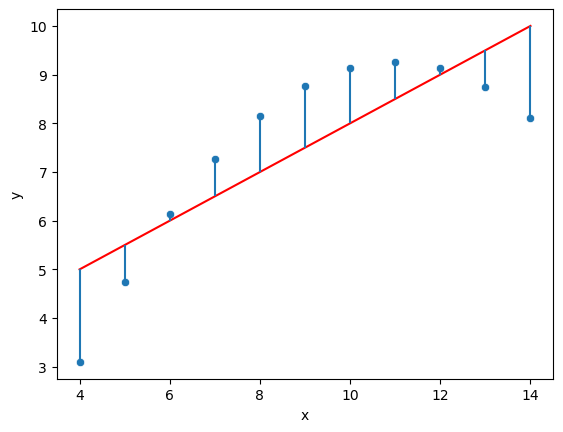

In [51]:
sns.scatterplot(data=quartet, x='x', y='y')
sns.lineplot(data=quartet, x='x', y='pred_y', color='red')
plt.vlines(quartet['x'], quartet['y'], quartet['y']-quartet['residuals'])

<AxesSubplot:xlabel='residuals', ylabel='Density'>

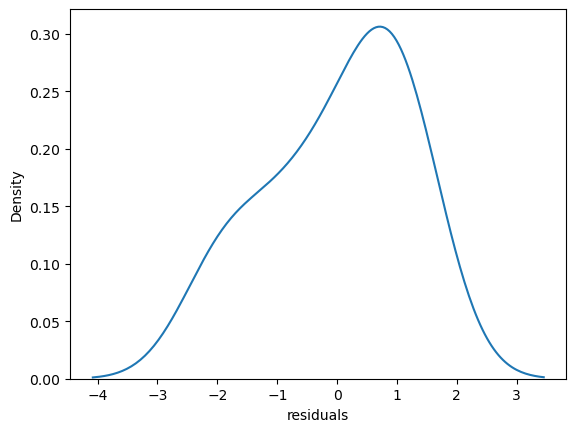

In [52]:
sns.kdeplot(quartet['residuals'])

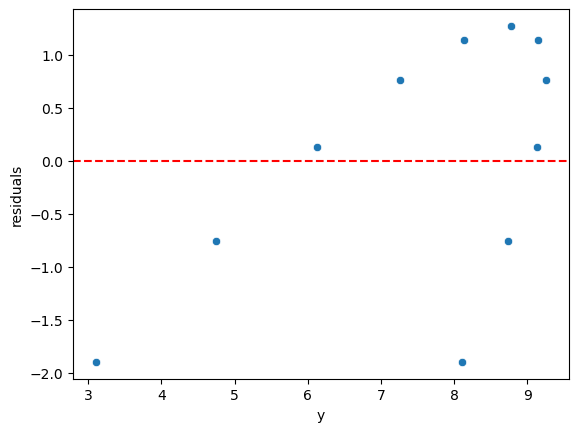

In [53]:
sns.scatterplot(data=quartet, x='y', y='residuals')
plt.axhline(y=0, color='red', linestyle='--')

In [54]:
test_res = y_test - test_predictions

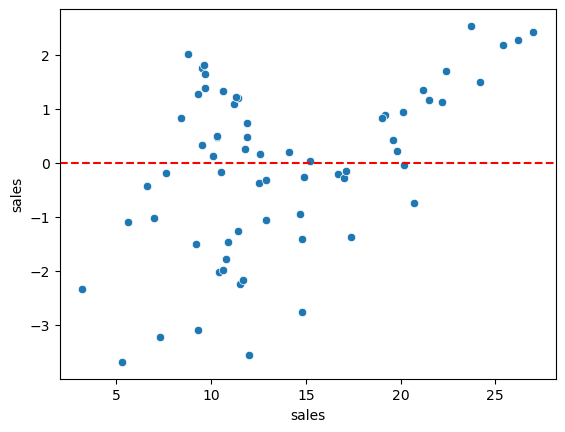

In [55]:
sns.scatterplot(x=y_test, y=test_res)
plt.axhline(y=0, color='red', linestyle='--')

<AxesSubplot:xlabel='sales', ylabel='Count'>

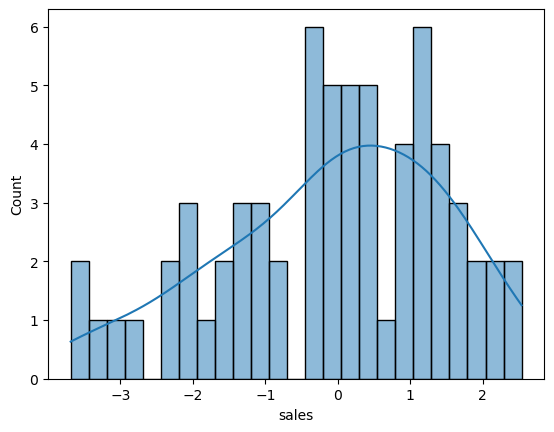

In [56]:
sns.histplot(test_res, bins=25, kde=True)

In [57]:
import scipy as sp

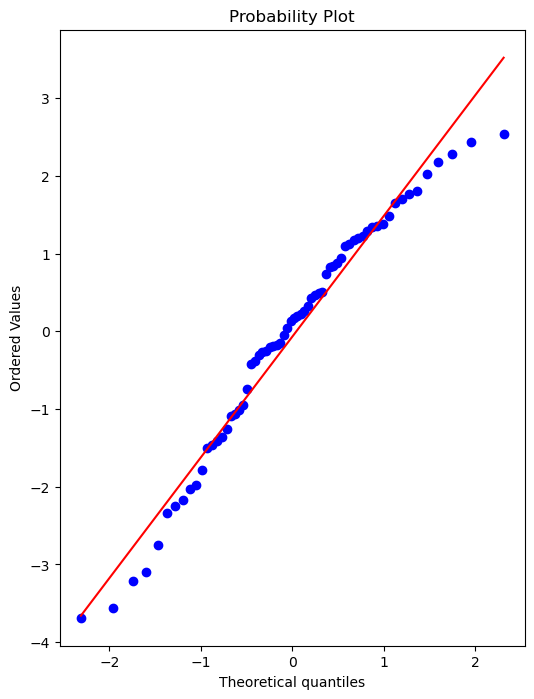

In [60]:
fig, ax = plt.subplots(figsize=(6,8), dpi=100)
_= sp.stats.probplot(test_res, plot=ax)